### A shopkeeper keeps records of his customers like age, gender, and annual income. Now, he wants to enhance his business by offering attractive deals. How should the shopkeeper provide these offers to his customers. Create machine learning model using Kmeans algorithm and help shopkeeper to identify group of customers.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('shop.csv')

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [12]:
df.shape

(200, 5)

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df[df.duplicated()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
features_name = ['Annual Income (k$)', 'Spending Score (1-100)']
features = df[features_name]

outliers_index = []

for column in features_name:
    # Calculate IQR
    Q1 = features[column].quantile(0.25)
    Q3 = features[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = features[(features[column] < lower_bound) | (features[column] > upper_bound)]
    
    for idx in outliers.index:
        if idx not in outliers_index:
            outliers_index.append(idx)
    
    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in Annual Income (k$): 2
Number of outliers in Spending Score (1-100): 0


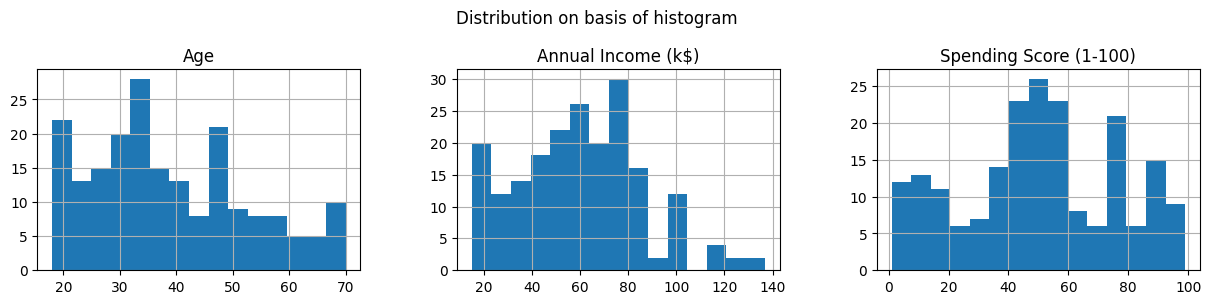

In [19]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

df[num_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribution on basis of histogram ')
plt.show()

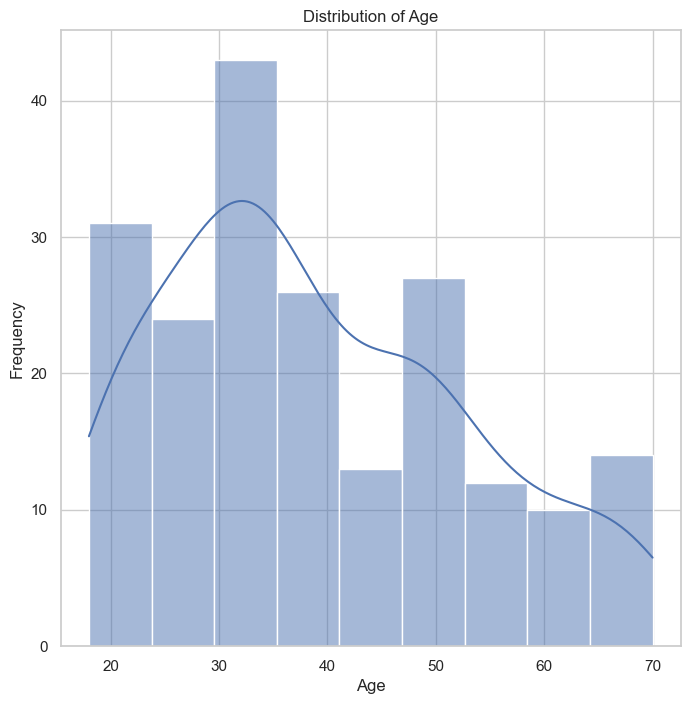

In [34]:
# Set style for seaborn
sns.set(style='whitegrid')

# Plot distribution of Age
plt.figure(figsize=(8, 8))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


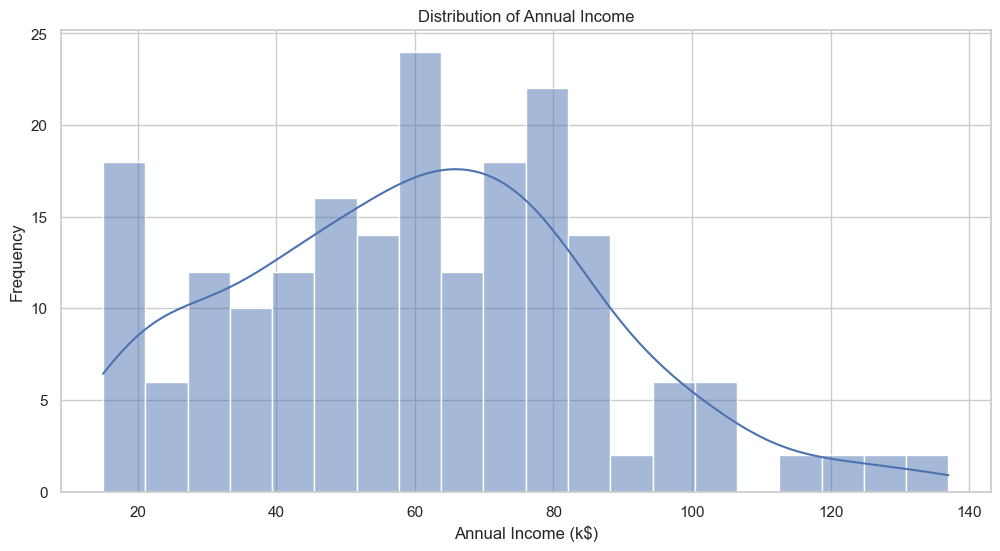

In [32]:

# Plot distribution of Annual Income
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()


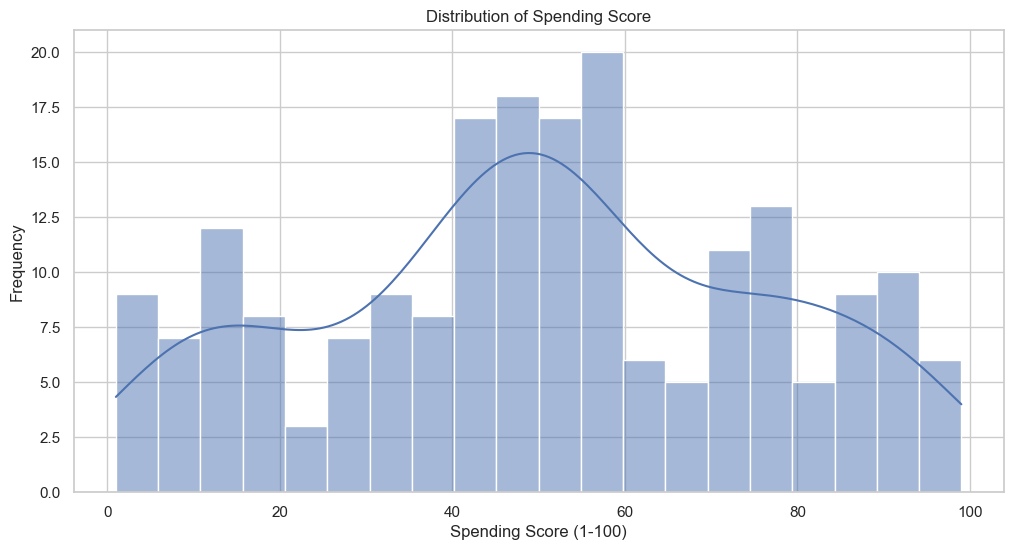

In [33]:

# Plot distribution of Spending Score
plt.figure(figsize=(12, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

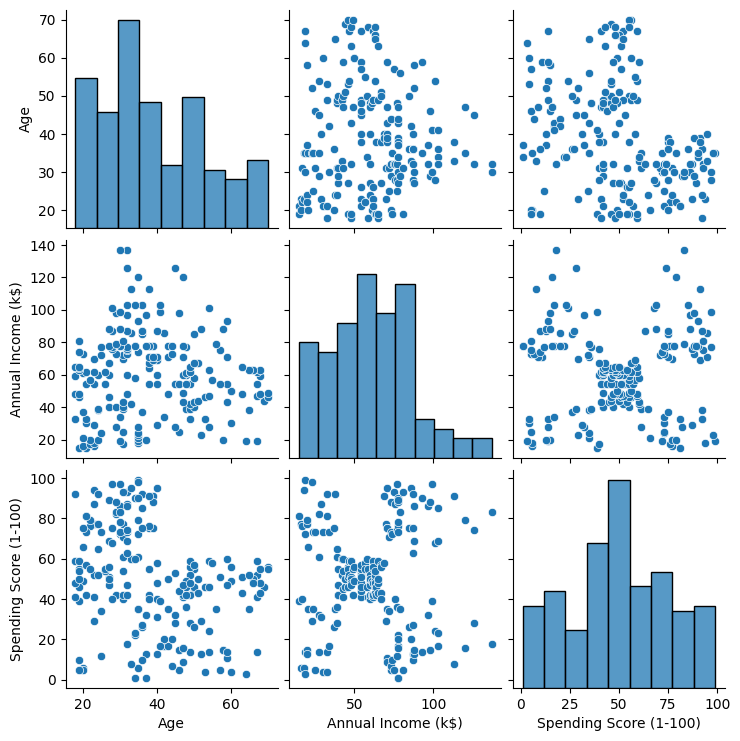

In [23]:
sns.pairplot(df[num_cols])
plt.show()

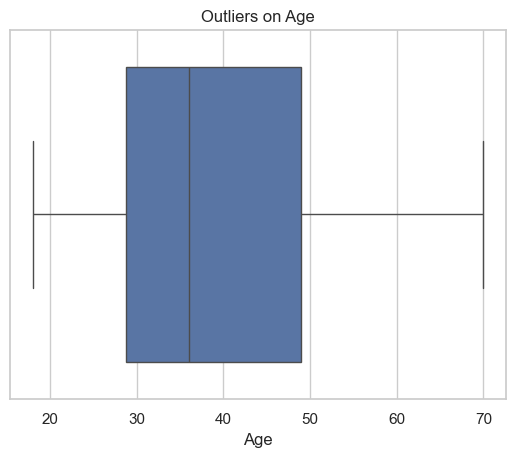

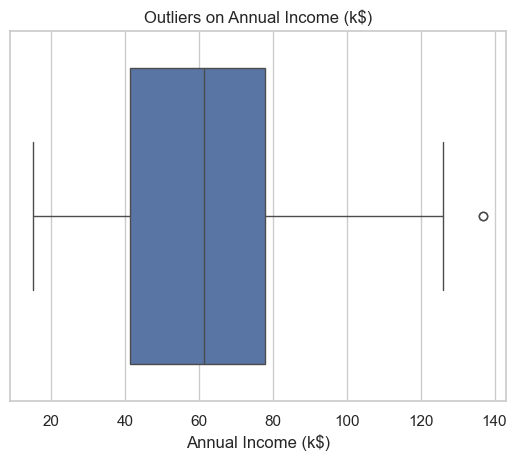

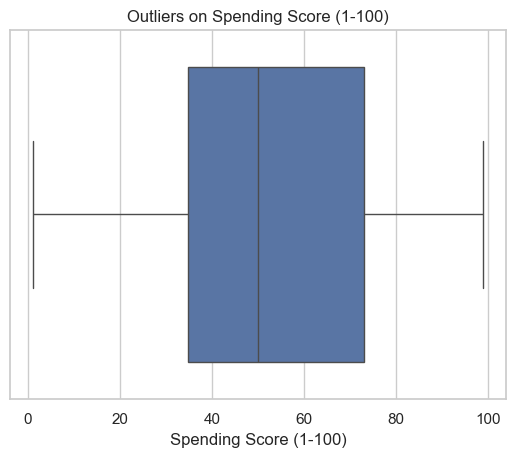

In [36]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Outliers on {col}')
    plt.show()

In [37]:
age = df.groupby('Age')['Spending Score (1-100)'].mean().reset_index()
print(age)

    Age  Spending Score (1-100)
0    18               60.000000
1    19               39.750000
2    20               40.200000
3    21               66.800000
4    22               70.000000
5    23               63.333333
6    24               71.500000
7    25               39.666667
8    26               54.500000
9    27               60.333333
10   28               70.000000
11   29               76.600000
12   30               80.285714
13   31               63.875000
14   32               66.000000
15   33               54.333333
16   34               39.200000
17   35               63.888889
18   36               52.500000
19   37               15.333333
20   38               63.166667
21   39               84.666667
22   40               47.500000
23   41               28.000000
24   42               18.500000
25   43               34.000000
26   44               13.500000
27   45               37.666667
28   46               21.333333
29   47               28.500000
30   48 

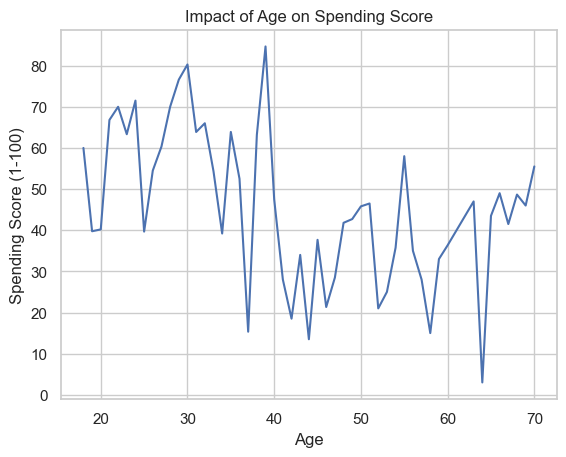

In [38]:
sns.lineplot(x='Age', y='Spending Score (1-100)', data=age)
plt.title('Impact of Age on Spending Score')
plt.show()

In [39]:
avg_income_gender = df.groupby('Genre')['Annual Income (k$)'].mean()
print("Average income by gender:\n", avg_income_gender)

Average income by gender:
 Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


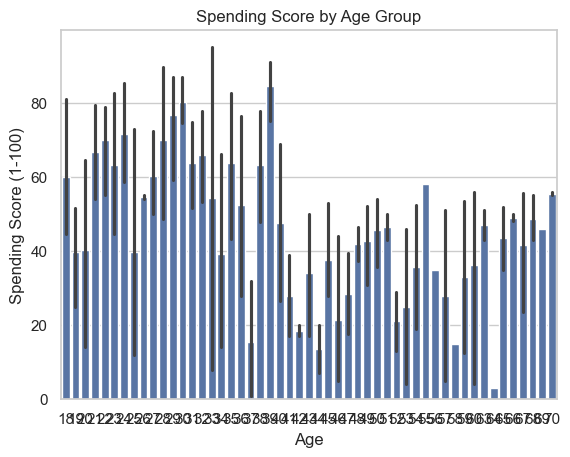

In [40]:
sns.barplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Age Group')
plt.show()

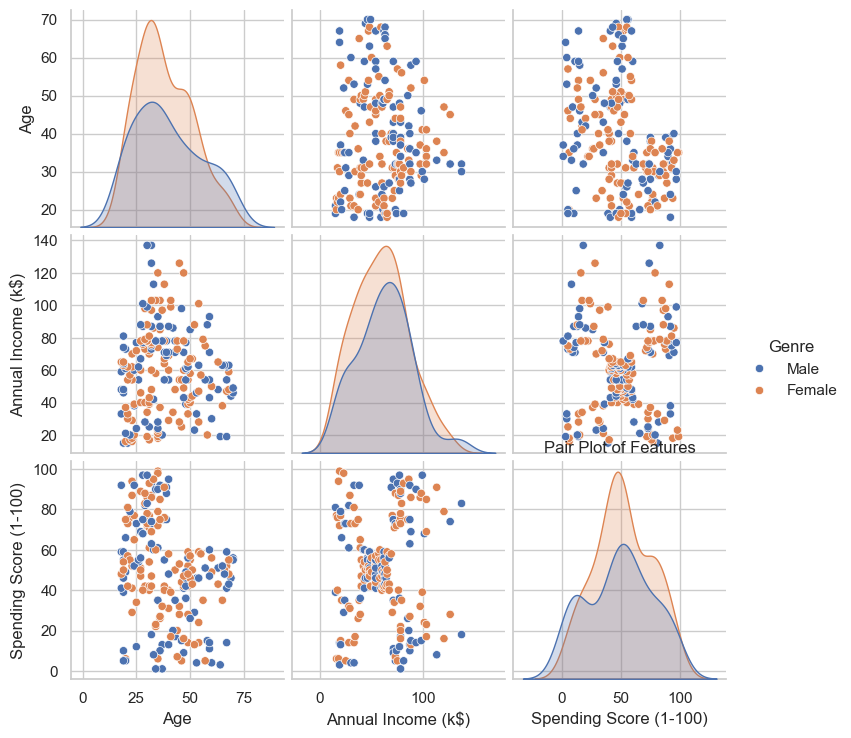

In [43]:
# Pair plot to see relationships between features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre']], hue='Genre')
plt.title('Pair Plot of Features')
plt.show()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')


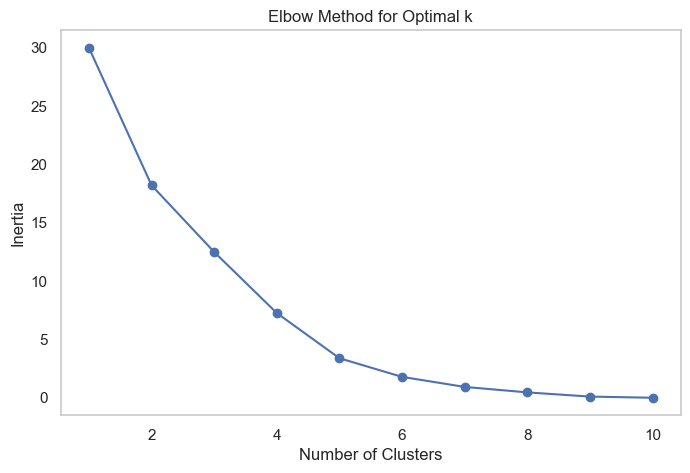

In [76]:

# Check the columns in your DataFrame
print(df.columns)  # Check column names

# Select the feature columns using correct names
features = df[['CustomerID', 'Age', 'Annual Income (k$)']]  # Replace with actual names

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Determining the Optimal Number of Clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, max_iter=300, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [77]:
from sklearn.cluster import KMeans

# Assuming you have already scaled your features and chosen the number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Replace 3 with your chosen number of clusters
data['Cluster'] = kmeans.fit_predict(scaled_features)  # Make sure to replace `scaled_features` with your actual data


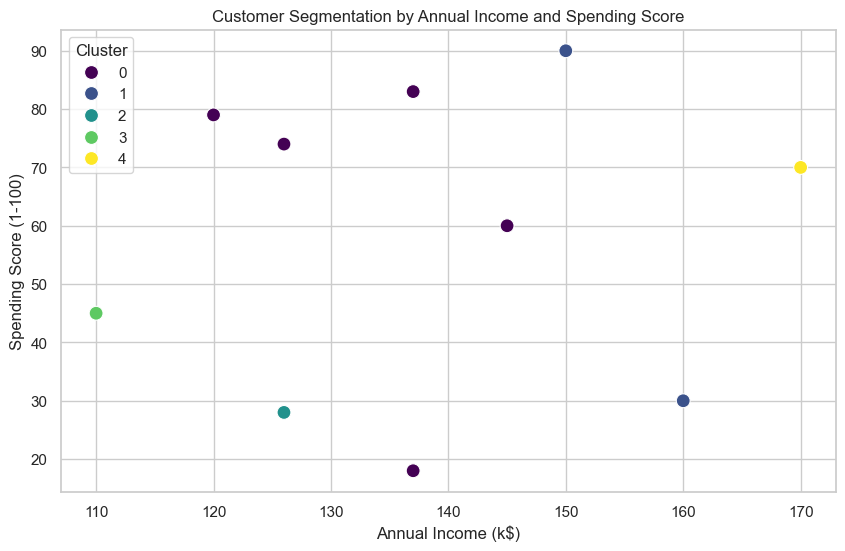

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [63]:
# Step 6: Applying K-means Clustering

# Choose the number of clusters based on the elbow method
k = 5 # Assume we determined 3 is optimal from the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = clusters

In [65]:
# Group by clusters and calculate the mean for each numeric feature
cluster_analysis = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis)


          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        32.0              137.00                   18.00
1        50.0              150.00                   90.00
2        32.5              123.25                   70.25
3        28.5              157.50                   65.00
4        42.0              160.00                   30.00
5        45.0              126.00                   28.00


In [66]:
df['Annual Income (k$)'] = pd.to_numeric(data['Annual Income (k$)'], errors='coerce')
df['Spending Score (1-100)'] = pd.to_numeric(data['Spending Score (1-100)'], errors='coerce')

In [68]:
# Step 7: Analyzing the Clusters

# Group by clusters and calculate the mean for numeric features
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cluster_analysis_numeric = df.groupby('Cluster')[numeric_columns].mean()

# For categorical data, we can use the mode (most frequent value)
cluster_analysis_genre = df.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])

# Combine the two analyses into a single DataFrame
cluster_analysis = cluster_analysis_numeric.join(cluster_analysis_genre)

print(cluster_analysis)


          Age  Annual Income (k$)  Spending Score (1-100)  Gender
Cluster                                                          
0        32.0              137.00                   18.00    Male
1        50.0              150.00                   90.00  Female
2        32.5              123.25                   70.25  Female
3        28.5              157.50                   65.00  Female
4        42.0              160.00                   30.00    Male
5        45.0              126.00                   28.00  Female


In [70]:
# Step 8: Interpreting the Clusters
# View the cluster analysis you already performed
print(cluster_analysis)

# Identify unique characteristics of each cluster
for cluster_id in range(cluster_analysis.shape[0]):
    print(f"\nCluster {cluster_id}:")
    print(f" - Age: {cluster_analysis.loc[cluster_id, 'Age']}")
    print(f" - Gender (mean): {cluster_analysis.loc[cluster_id, 'Gender']}")
    print(f" - Annual Income: {cluster_analysis.loc[cluster_id, 'Annual Income (k$)']}")
    print(f" - Spending Score: {cluster_analysis.loc[cluster_id, 'Spending Score (1-100)']}")

          Age  Annual Income (k$)  Spending Score (1-100)  Gender
Cluster                                                          
0        32.0              137.00                   18.00    Male
1        50.0              150.00                   90.00  Female
2        32.5              123.25                   70.25  Female
3        28.5              157.50                   65.00  Female
4        42.0              160.00                   30.00    Male
5        45.0              126.00                   28.00  Female

Cluster 0:
 - Age: 32.0
 - Gender (mean): Male
 - Annual Income: 137.0
 - Spending Score: 18.0

Cluster 1:
 - Age: 50.0
 - Gender (mean): Female
 - Annual Income: 150.0
 - Spending Score: 90.0

Cluster 2:
 - Age: 32.5
 - Gender (mean): Female
 - Annual Income: 123.25
 - Spending Score: 70.25

Cluster 3:
 - Age: 28.5
 - Gender (mean): Female
 - Annual Income: 157.5
 - Spending Score: 65.0

Cluster 4:
 - Age: 42.0
 - Gender (mean): Male
 - Annual Income: 160.0
 - Spend

In [72]:
# Step 9: Developing Targeted Marketing Strategies

# Display cluster characteristics
for cluster_id in range(cluster_analysis.shape[0]):
    print(f"\nCluster {cluster_id} Characteristics:")
    print(f" - Average Age: {cluster_analysis.loc[cluster_id, 'Age']}")
    print(f" - Average Gender (0=Male, 1=Female): {cluster_analysis.loc[cluster_id, 'Gender']}")
    print(f" - Average Annual Income: ${cluster_analysis.loc[cluster_id, 'Annual Income (k$)'] * 1000}")
    print(f" - Average Spending Score: {cluster_analysis.loc[cluster_id, 'Spending Score (1-100)']}")


Cluster 0 Characteristics:
 - Average Age: 32.0
 - Average Gender (0=Male, 1=Female): Male
 - Average Annual Income: $137000.0
 - Average Spending Score: 18.0

Cluster 1 Characteristics:
 - Average Age: 50.0
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $150000.0
 - Average Spending Score: 90.0

Cluster 2 Characteristics:
 - Average Age: 32.5
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $123250.0
 - Average Spending Score: 70.25

Cluster 3 Characteristics:
 - Average Age: 28.5
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $157500.0
 - Average Spending Score: 65.0

Cluster 4 Characteristics:
 - Average Age: 42.0
 - Average Gender (0=Male, 1=Female): Male
 - Average Annual Income: $160000.0
 - Average Spending Score: 30.0

Cluster 5 Characteristics:
 - Average Age: 45.0
 - Average Gender (0=Male, 1=Female): Female
 - Average Annual Income: $126000.0
 - Average Spending Score: 28.0


In [73]:
import pandas as pd

# Example: Creating the DataFrame manually with 5 clusters
post_campaign_data = pd.DataFrame({
    'Cluster': [1, 1, 2, 2, 3, 4, 4, 5, 5],
    'Sales': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'Engagement Rate': [0.8, 0.85, 0.9, 0.75, 0.95, 0.88, 0.92, 0.87, 0.91]
})

# Calculate total sales and average engagement rate by cluster
evaluation = post_campaign_data.groupby('Cluster').agg({
    'Sales': 'sum',
    'Engagement Rate': 'mean'
}).reset_index()

print("\nCampaign Effectiveness Evaluation:")
print(evaluation)


Campaign Effectiveness Evaluation:
   Cluster  Sales  Engagement Rate
0        1    250            0.825
1        2    450            0.825
2        3    300            0.950
3        4    750            0.900
4        5    950            0.890
